# Write COCO Format to Semantic Format

Need to choose data directory and COCO dataset json file. Also need to choose the path to write images to (with same name as original file).

Need to change `get_xview_localization_gt_image` to `get_xview_damage_gt_image` or vice versa.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from detectron2_repo.detectron2.evaluation.xview_evaluation import (
    get_xview_localization_gt_image,
    get_xview_damage_gt_image
)
import cv2
import os
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [19]:
# The images where the COCO dataset lives.
dataDir='data/train/images'
# The COCO dataset json file.
annFile='datasets/combined_xview_instance_segmentation_dataset_train.json'
# Location to write data to.
gt_path = "data/train_gt/"

In [20]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.76s)
creating index...
index created!


In [21]:
# display COCO categories and supercategories
catIds = coco.getCatIds();
cats = coco.loadCats(catIds)
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
building

COCO supercategories: 
building


In [22]:
def get_image_with_class_value(image, value):
    return np.where(image == value, 1, 0).astype("uint8") * 255

In [24]:
# Go through all images.
imgIds = coco.getImgIds()
from tqdm import tqdm
for img_id in tqdm(imgIds):
    img = coco.loadImgs(img_id)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    
    file_name = img['file_name']
    height = 1024
    width = 1024
    image_id = img_id
    pred_image = get_xview_localization_gt_image(file_name, height, width, image_id, anns)
#     cv2.imwrite(os.path.join(gt_path, file_name), pred_image)
    current = io.imread('%s/%s'%(gt_path,img['file_name']))
    orig = io.imread('%s/%s'%(dataDir,img['file_name']))
    assert np.array_equal(current, pred_image)
    

100%|██████████| 9076/9076 [04:55<00:00, 30.41it/s]


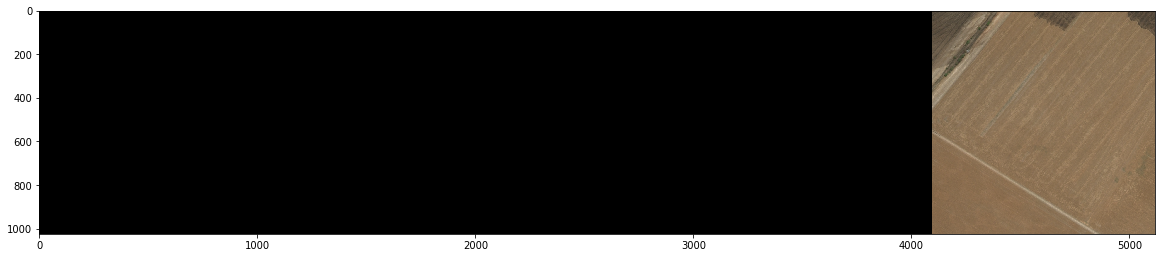

In [13]:
orig = io.imread('%s/%s'%(dataDir,img['file_name']))
pred = np.stack((pred_image,)*3, axis=-1)
image = np.hstack([
    get_image_with_class_value(pred, 1),
    get_image_with_class_value(pred, 2),
    get_image_with_class_value(pred, 3),
    get_image_with_class_value(pred, 4),
    orig]
)
plt.figure(figsize=(20, 10))
plt.imshow(image)